<a href="https://colab.research.google.com/github/NVaduthala3/cmps-6160-project.github.io/blob/main/CMPS6160Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# An Analysis of Commonly Held Fan Beliefs About Referees
Nathaniel Vaduthala

# Project Goals

In this project, I will attempt to see if commonly held beliefs about referees amongst fans of the NBA are true. In particular, these beliefs include opinions such as "star players always receive preferential treatment when it comes to foul calls", "in the NBA Playoffs, the referees call less fouls", and "some referees are fair, while others are biased." 

# Datasets

In order to develop a complete understanding of every question, I will be using 
multiple datasets to answer these questions. The first of the datasets will be the one regarding players' average statistics per game along with teams' total statistics, hosted by [Basketball Reference](https://https://www.basketball-reference.com/leagues/NBA_2022_per_minute.html). This data is collected by Sportradar, the official statistics partner of the NBA, and so this dataset is trustworthy. Using this dataset, I will attempt to answer the question "is it true that NBA referees call less fouls in the Playoffs than in the Regular Season?" In particular, I will be looking at the average number of foul calls per game in the Regular Season, and compare it with the average number of foul calls per game in the Playoffs from 2012 to 2022. Along with this, I will attempt to answer the question "is it true that star players receive preferential treatment?". I will specifically be looking at foul calls in the Regular Season. In order to answer this question, I will determine if there is a relationship between average fouls per game and different single value metrics. However, one issue with this analysis is that it is an estimate. We cannot determine exactly how many foul calls a player received or didn't receive that were in their favor. To mitigate this issue, we turn to our second data set.

The second data set I will be using is the [NBA's Officiating Last 2 Minutes](https://raw.githubusercontent.com/atlhawksfanatic/L2M/master/1-tidy/L2M/L2M-stats-nba.csv) dataset.  This dataset contains the list of incorrect calls performed by referees in the last two minutes of a game where the score differential was at most three points. I will add that although this data originates from the NBA, I was able to find it in tidy data form. It was cleaned up into this format by GitHub user atlhawksfanatic. I have reviewed what they did to clean up the data into tidy form, and I do not see any issues, and so I view this dataset as also being trustworthy. I will be using this dataset to help answer the question "is it true that star players receive preferential treatment?" The strength of this dataset comes from the fact that we can tell which players received favorable foul calls and how many they received, and so using this dataset, along with the Basketball Reference dataset, we can develop a more accurate understanding if star players do receive preferential treatment. I will also be using this dataset to answer the question "are there some referees that can be considered 'good' or 'bad'?" I define a *good referee*, to be "a referee that has called fouls in a manner that provides no evidence of statistical bias", and a *bad referee* to be "a referee that cannot be considered good." I will be using this dataset to see how many incorrect calls each referee made in the last two minutes of a close game on average. However, while this is helpful because we can see exactly how many incorrect calls each referee made in the last two minutes of a close game, this information does not tell us about the other 46 minutes of gameplay. Any extrapolation made just from this data will not be accurate. In order to develop a better understanding of the innacurate calls made throughout the entire game, we will be using the third dataset.

The third data set I will be using is one regarding referee statistics provided by [Basketball Reference](https://www.basketball-reference.com/referees/2022_register.html). This data set provides information about the average number of foul calls each referee made in the 2021-22 NBA season and the average number of foul calls they made on the home and away teams. Using this data, I will be comparing the statistics of foul calls made by each referee to the average and determine if there are any outliers. This will help us develop a better overall understanding if there are "good" and "bad" referees.

# Collaboration Plan

Because I am a graduate student, I will be working alone on this project. From now until October 22, I will be cleaning the data sets and putting them into tidy data format if necessary. From October 22 to November 10, I plan on performing exploratory data analysis in order to begin developing conclusions. I will primarily be using Google Colab on this project. 

# ETL (Extraction, Transform, and Load)

Currently, I have loaded two of the three datasets that I plan on using. I have loaded the datatset from Basketball Reference regarding players' average statistics and the dataset from the NBA's Last 2 Minutes report. Currently, I have focused on cleaning and tidying the dataset regarding players' averages. 

# Relation Between Single-Value Player Metrics and Personal Foul Call Amounts
Before we can even determine if there is a relationship between a player's stardom and the number of foul calls they receive, we first need to define what a "star player" is. To do so, I will be using common single-value player metrics. These metrics attempt to provide a single number that quantifies how talented a player is. The single-value player metrics I will be using are Win Shares per 48 (WS/48), Value Over Replacement Plyer (VORP), and Estimated Plus-Minus (EPM). The higher these values are, the more of a star the corresponding player is. Therefore, we will attempt to see if there is a relationship between these values and the average number of foul calls per game. I imported one data set from Basketball Reference that included the average number of personal foul calls a player received, along with another data set from Basketball Reference that was primarily focused on single-value player metrics.

In [188]:
# Import data for BBall Ref

import pandas as pd
import numpy as np

url_br_2021_per36 = 'https://raw.githubusercontent.com/NVaduthala3/cmps-6160-project.github.io/main/bball_ref_2021_per36.csv' # '2021' here means 2021-22 season
df_br_2021_per36 = pd.read_csv(url_br_2021_per36) # DataFrame containing players' average stats

url_br_2021_adv = 'https://raw.githubusercontent.com/NVaduthala3/cmps-6160-project.github.io/main/bball_ref_2021_advanced.csv'
df_br_2021_adv = pd.read_csv(url_br_2021_adv) # DateFrame containing single-value metrics

df_br_2021_per36.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional
0,1,Precious Achiuwa,C,22,TOR,73,28,1725,5.5,12.6,...,3.0,6.8,9.9,1.7,0.8,0.9,1.8,3.2,13.9,achiupr01
1,2,Steven Adams,C,28,MEM,76,75,1999,3.8,6.9,...,6.3,7.4,13.7,4.6,1.2,1.1,2.1,2.8,9.5,adamsst01
2,3,Bam Adebayo,C,24,MIA,56,56,1825,8.0,14.4,...,2.7,8.4,11.1,3.7,1.6,0.9,2.9,3.4,21.1,adebaba01
3,4,Santi Aldama,PF,21,MEM,32,0,360,5.3,13.2,...,3.3,5.4,8.7,2.1,0.6,1.0,1.6,3.6,13.2,aldamsa01
4,5,LaMarcus Aldridge,C,36,BRK,47,12,1050,8.6,15.7,...,2.5,6.3,8.8,1.4,0.5,1.6,1.5,2.7,20.8,aldrila01


After importing the data for the 2021-22 NBA season, it is necessary now to remove of any data points that cannot provide us any value. In order to take into account that different players play a different number of minutes, and therefore will most likely have a higher number of foul calls, I imported in the data set that proportionately normalized the players' average statistics to if they had played 36 minutes every game, df_br_2021_per36. However, in the case of players that had played either less than 15 minutes on average or had played less than 35 games, we cannot make any normalization, as they have not played enough to make a realistic  extrapolation. Therefore, I want to remove these players from df_br_2021_per36.

But before I can do that, I have to first create a new column that described how many minutes per game a player played on average. This is because the dataset containing the players' average statistics did not contain this information. But, it did contain the total number of minutes played ('MP') and the total number of games played ('G'), and so with this, I was able to find the average number of minutes played ('MPG'). 

I also force every value that was greater than 6 in the "Personal Fouls" column of df_br_2021_per36 to be equal to 6, as a player cannot receive more than 6 fouls in an NBA game.

After performing this, it is also necessary to perform an inner join onto DataFrame containing information regarding the players' average statistics, df_br_2021, adv, and df_br_2021_per36, as df-br_2021_adv does not contain any information about average fouls called on the player.

In [189]:
# clean up data for BBall Ref

df_br_2021_per36['MPG'] = df_br_2021_per36.apply(lambda row: row['MP'] / row['G'], axis = 1) # calculate minutes per game
df_br_2021_per36 = df_br_2021_per36.drop(df_br_2021_per36[(df_br_2021_per36['MPG'] < 15) | (df_br_2021_per36['G'] < 35)].index) # remove players with insufficient games/min playes
df_br_2021_per36.loc[df_br_2021_per36['PF'] > 6, 'PF'] = 6 # impossible to have more than 6 fouls 

df_br_2021_adv_pf = df_br_2021_adv.merge(df_br_2021_per36, how = 'inner') # add personal fouls column onto advanced stats dataframe

df_br_2021_adv_pf.head()

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,MPG
0,1,Precious Achiuwa,C,22,TOR,73,1725,12.7,0.503,0.259,...,3.0,6.8,9.9,1.7,0.8,0.9,1.8,3.2,13.9,23.630137
1,2,Steven Adams,C,28,MEM,76,1999,17.6,0.560,0.003,...,6.3,7.4,13.7,4.6,1.2,1.1,2.1,2.8,9.5,26.302632
2,3,Bam Adebayo,C,24,MIA,56,1825,21.8,0.608,0.008,...,2.7,8.4,11.1,3.7,1.6,0.9,2.9,3.4,21.1,32.589286
3,5,LaMarcus Aldridge,C,36,BRK,47,1050,19.6,0.604,0.100,...,2.5,6.3,8.8,1.4,0.5,1.6,1.5,2.7,20.8,22.340426
4,6,Nickeil Alexander-Walker,SG,23,TOT,65,1466,10.5,0.475,0.497,...,0.9,3.7,4.6,3.8,1.1,0.6,2.3,2.5,17.0,22.553846


From here, we can see some preliminary results.

Text(0, 0.5, 'Adjusted Personal Fouls/Game')

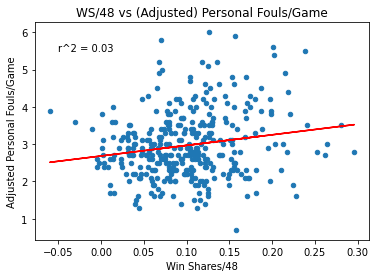

In [190]:
# Plot WS/48 vs PF
import matplotlib.pyplot as plt
from scipy import stats

df_br_2021_adv_pf.plot.scatter(x = 'WS/48', y = 'PF')

result = stats.linregress(x = df_br_2021_adv_pf['WS/48'], y = df_br_2021_adv_pf['PF'])

plt.plot(df_br_2021_adv_pf['WS/48'], result.intercept + result.slope*(df_br_2021_adv_pf['WS/48']), 'r')
plt.text(-0.05, 5.5, 'r^2 = %0.2f' % (result.rvalue) ** 2)
plt.title('WS/48 vs (Adjusted) Personal Fouls/Game')
plt.xlabel('Win Shares/48')
plt.ylabel('Adjusted Personal Fouls/Game')

We can see from the graph that there does not appear to be any relationship between an increased Win Shares per 48--and therefore increased stardom--and the average number of personal fouls called on the player. Although there is a positive correlation, the *r-squared* value is small enough that we cannot make a claim of there being any relation. 

Text(0, 0.5, 'Adjusted Personal Fouls/Game')

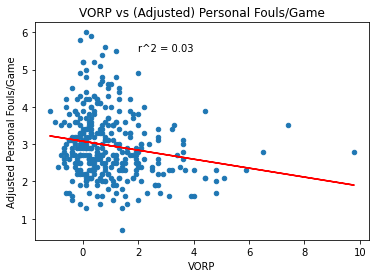

In [191]:
df_br_2021_adv_pf.plot.scatter(x = 'VORP', y = 'PF')

result2 = stats.linregress(x = df_br_2021_adv_pf['VORP'], y = df_br_2021_adv_pf['PF'])

plt.plot(df_br_2021_adv_pf['VORP'], result2.intercept + result2.slope*(df_br_2021_adv_pf['VORP']), 'r')
plt.text(2, 5.5, 'r^2 = %0.2f' % (result2.rvalue) ** 2)
plt.title('VORP vs (Adjusted) Personal Fouls/Game')
plt.xlabel('VORP')
plt.ylabel('Adjusted Personal Fouls/Game')

In a similar manner as in the first graph, we cannot conclude any definitive relationship between the stardom of a player and the number of foul call received in a game. In this case, the correlation is negative, but the *r-squared* value is once again too small for us to state a relationship. 

# Calculate Actual Number of Favorable Calls Made

Now, I will look at the actual favorable calls made, and see if there is a relationship between the single-value player metrics and the number of favorable calls made. In particular, what I will be counting is the *net number of favorable calls*. In the NBA's Last 2 Minutes dataset, there are columns that outlines which player was disadvantaged and which player committed the foul. As a result, I can count how many times every player was either at an advantageous position in a foul call or ata a disadvantageous position. By assigning the value 1 to an advantageous position, and a -1 to a disadvantageous position, I will count up all the situations that a player was in, and this will be their net number of favorable calls. From here, I will then see if there is a relationship between this variable and the single-value player metrics. 

Before I can do this, I must first remove all the rows that contain data not in the 2021-22 season.

In [192]:
# Import data from NBA L2M, provided by atlhawksfanatic

url_l2m = 'https://raw.githubusercontent.com/atlhawksfanatic/L2M/master/1-tidy/L2M/L2M-stats-nba.csv'
df_l2m = pd.read_csv(url_l2m)
df_l2m = df_l2m.drop((df_l2m[(df_l2m['season'] != 2022) | (df_l2m['playoff'] == True)].index)) #'2022' here means 2021-22 season, and only want Regular Season
df_l2m.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (7,24,26,30,31,37,40) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,period,time,call_type,committing,disadvantaged,decision,comments,game_details,page,file,...,committing_side,disadvantaged_min,disadvantaged_team,disadvantaged_side,type2,time_min,time_sec,time2,season,playoff
54498,Q4,01:33.8,Violation: Delay of Game,Aaron Henry,Aaron Henry,IC,Called + No Infraction,NaN,NaN,0012100023.csv,...,home,7.366667,PHI,home,DELAY OF GAME,1,33.8,1.563333,2022,False
54499,Q4,00:53.2,Violation: Delay of Game,Aaron Henry,Aaron Henry,CC,Called + Infraction,NaN,NaN,0012100023.csv,...,home,7.366667,PHI,home,DELAY OF GAME,0,53.2,0.886667,2022,False
54500,Q4,00:30.9,Violation: Delay of Game,Aaron Henry,Shaquille Harrison,CNC,No Called + No Infraction,NaN,NaN,0012100023.csv,...,home,7.366667,PHI,home,DELAY OF GAME,0,30.9,0.515000,2022,False
54501,Q4,00:23.3,Turnover: Traveling,Jaden Springer,Raptors,INC,No Called + Infraction,NaN,NaN,0012100023.csv,...,home,NaN,TOR,NaN,TRAVELING,0,23.3,0.388333,2022,False
54502,Q4,01:45,Foul: Shooting,Obi Toppin,Jayson Tatum,CNC,Toppin (NY) makes clean contact with the ball ...,NaN,NaN,0022100005.csv,...,home,44.650000,BOS,away,SHOOTING,1,45.0,1.750000,2022,False


# Further Plans

From here, I will continue to see if there is a relationship between any of the commonly used single-value player metrics and the number of fouls called on the player. I will also look to see if there is any statistical evidence of referees having any bias, such as consistently calling more fouls on Away teams than Home teams. After that, I plan on determining if truly is a discrepency between the fouls called in the Playoffs compared to the Regular Season.

If time permits, I may also look to see if there is bias in foul calls made in games that can lead to the extension of a Playoff series. An instance of such a game is a Game 6 in the Playoffs, where one team has 3 wins and 2 losses, while the other has 2 wins and 3 losses and is facing elimination. However, this would require the use of other datasets. 